# Data Import
Floatingcar tracks data is imported and saved in geofeather format, which is a faster for geometries with geopandas. Tracks are also clipped by the initial bounding box to cut out the tracks extending beyond the extent of bounding box.

In [9]:
import pandas as pd
import geopandas as gpd

from geofeather import to_geofeather, from_geofeather

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

In [4]:
## Mönchengladbach bbox coordinates
bbox = BboxSelector([
    6.3301849365234375, # min_x
    51.13369295212583, # min_y
    6.540985107421875, # max_x
    51.23870648334856  # max_y
])
# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=500) # requesting 50 tracks inside the bbox
track_df.head()

,id,time,geometry,GPS Bearing.value,GPS Bearing.unit,Intake Temperature.value,Intake Temperature.unit,MAF.value,MAF.unit,Intake Pressure.value,...,Consumption.value,Consumption.unit,Throttle Position.value,Throttle Position.unit,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit
0,5b46294f44ea850910a1c1e0,2018-07-11T06:07:23,POINT (6.41455 51.20328),117.943870,deg,28.000001,c,35.669282,l/s,120.000001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5b46294f44ea850910a1c1e2,2018-07-11T06:07:28,POINT (6.41512 51.20308),115.088323,deg,28.000000,c,31.446508,l/s,113.073678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5b46294f44ea850910a1c1e3,2018-07-11T06:07:33,POINT (6.41564 51.20299),106.541059,deg,28.000000,c,28.072108,l/s,112.068772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5b46294f44ea850910a1c1e4,2018-07-11T06:07:38,POINT (6.41615 51.20291),99.885196,deg,28.000000,c,33.429661,l/s,129.759303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5b46294f44ea850910a1c1e5,2018-07-11T06:07:43,POINT (6.41671 51.20282),104.435649,deg,27.999999,c,25.774274,l/s,106.020177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#bounding box polygon in geodataframe
from shapely.geometry import Polygon
bboxpoly = Polygon([(6.3301849365234375, 51.13369295212583,), 
                                       (6.540985107421875,51.13369295212583), 
                                       (6.540985107421875, 51.23870648334856 ), 
                                       (6.3301849365234375,51.23870648334856)])
bboxpoly_gdf = gpd.GeoDataFrame([1], geometry=[bboxpoly])

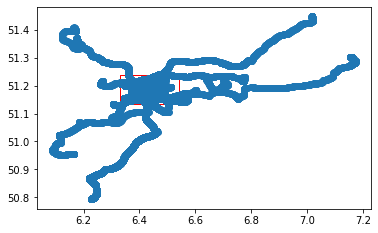

In [6]:
#plotting the tracks and bounding box shows the extending tracks
base = bboxpoly_gdf.plot(color='white', edgecolor='red')
track_df.plot(ax=base)

In [11]:
#clipping track_df by bboxpoly_gdf
clipTracks_df = gpd.clip(track_df, bboxpoly_gdf)

AttributeError: module 'geopandas' has no attribute 'clip'

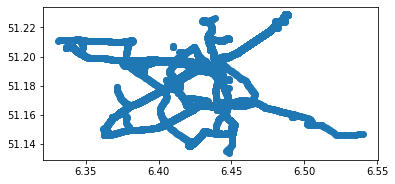

In [71]:
clipTracks_df.plot()

In [56]:
#checking clipped data
track_df.head()

,index,id,time,geometry,GPS Bearing.value,GPS Bearing.unit,Intake Temperature.value,Intake Temperature.unit,MAF.value,MAF.unit,...,Consumption.value,Consumption.unit,Throttle Position.value,Throttle Position.unit,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit
0,0,5b46294f44ea850910a1c1e0,2018-07-11T06:07:23,POINT (6.41455 51.20328),117.943870,deg,28.000001,c,35.669282,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5b46294f44ea850910a1c1e2,2018-07-11T06:07:28,POINT (6.41512 51.20308),115.088323,deg,28.000000,c,31.446508,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5b46294f44ea850910a1c1e3,2018-07-11T06:07:33,POINT (6.41564 51.20299),106.541059,deg,28.000000,c,28.072108,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5b46294f44ea850910a1c1e4,2018-07-11T06:07:38,POINT (6.41615 51.20291),99.885196,deg,28.000000,c,33.429661,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5b46294f44ea850910a1c1e5,2018-07-11T06:07:43,POINT (6.41671 51.20282),104.435649,deg,27.999999,c,25.774274,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
clipTracks_df.head()

,index,id,time,geometry,GPS Bearing.value,GPS Bearing.unit,Intake Temperature.value,Intake Temperature.unit,MAF.value,MAF.unit,...,Consumption.value,Consumption.unit,Throttle Position.value,Throttle Position.unit,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit
0,0,5b46294f44ea850910a1c1e0,2018-07-11T06:07:23,POINT (6.41455 51.20328),117.943870,deg,28.000001,c,35.669282,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5b46294f44ea850910a1c1e2,2018-07-11T06:07:28,POINT (6.41512 51.20308),115.088323,deg,28.000000,c,31.446508,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5b46294f44ea850910a1c1e3,2018-07-11T06:07:33,POINT (6.41564 51.20299),106.541059,deg,28.000000,c,28.072108,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5b46294f44ea850910a1c1e4,2018-07-11T06:07:38,POINT (6.41615 51.20291),99.885196,deg,28.000000,c,33.429661,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5b46294f44ea850910a1c1e5,2018-07-11T06:07:43,POINT (6.41671 51.20282),104.435649,deg,27.999999,c,25.774274,l/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#conversion to feather format
data_path = 'Data/Monchengladbach.feather'
clipTracks_df.reset_index(drop = True) #drop true to avoid the old index being added as a column, avoid already exists error
to_geofeather(clipTracks_df, data_path)

In [67]:
#checking data
checkTrack_df = from_geofeather('Data/Monchengladbach.feather')
checkTrack_df.columns

Index(['level_0', 'index', 'id', 'time', 'geometry', 'GPS Bearing.value',
       'GPS Bearing.unit', 'Intake Temperature.value',
       'Intake Temperature.unit', 'MAF.value', 'MAF.unit',
       'Intake Pressure.value', 'Intake Pressure.unit', 'Engine Load.value',
       'Engine Load.unit', 'GPS Accuracy.value', 'GPS Accuracy.unit',
       'GPS Altitude.value', 'GPS Altitude.unit', 'Rpm.value', 'Rpm.unit',
       'GPS Speed.value', 'GPS Speed.unit', 'GPS VDOP.value', 'GPS VDOP.unit',
       'GPS PDOP.value', 'GPS PDOP.unit', 'Speed.value', 'Speed.unit',
       'GPS HDOP.value', 'GPS HDOP.unit', 'track.id', 'track.length',
       'track.begin', 'track.end', 'sensor.type', 'sensor.engineDisplacement',
       'sensor.model', 'sensor.id', 'sensor.fuelType',
       'sensor.constructionYear', 'sensor.manufacturer',
       'Calculated MAF.value', 'Calculated MAF.unit', 'CO2.value', 'CO2.unit',
       'Consumption.value', 'Consumption.unit', 'Throttle Position.value',
       'Throttle Position

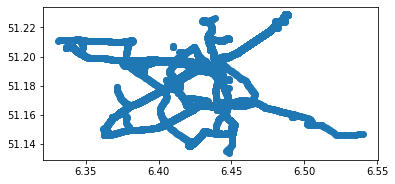

In [68]:
checkTrack_df.plot()